In [205]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris # not using as csv downloaded
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [206]:
df = pd.read_csv('Iris.csv') # Loads the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [207]:
# Iris setosa
df['Species'] = df['Species'].replace('Iris-setosa', 0)
# Not Iris setosa
df['Species'] = df['Species'].replace('Iris-virginica', 1)
df['Species'] = df['Species'].replace('Iris-versicolor', 1)
# Variables
x = df.iloc[:,[1,2,3,4]].values # independent
y = df.iloc[:,[5]].values # dependent

In [208]:
# reshape
x = x.reshape(-1, 4)
x = preprocessing.scale(x) #scale the data so that it is easier to fit
y = y.reshape(-1, 1)
# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [209]:
# fit to model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train.ravel()) # ravel converts array shape to (n, ) (i.e. flattens it)

# make predictions on test data
y_pred = log_reg.predict(x_test).reshape(-1,1)

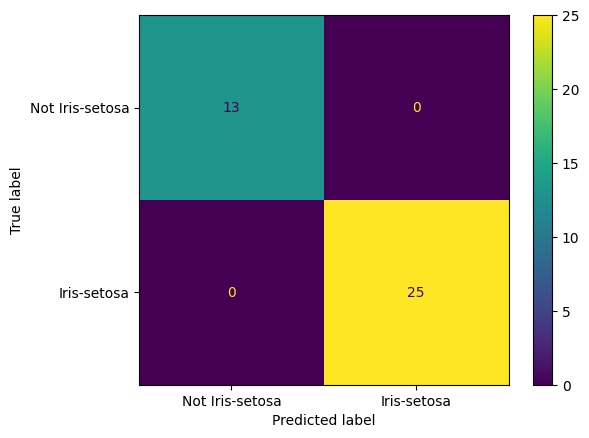

In [210]:
# Confustion matrix
classes = df['Species'].values
cm_df = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_df, display_labels = ['Not Iris-setosa', 'Iris-setosa'])
cm_display.plot()
plt.show()
plt.close()

Model seems to have similar precision and recall as it had no errors in its predictions.

In [211]:
# Accuracy
accuracy = np.sum(np.equal(y_test, y_pred))/len(y_test) # no. correctly predicted divided by total no. predictions
print(f"Accuracy score: {accuracy}")
# alternatively: accuracy = (cm_df[0][0])+(cm_df[1][1]) / ((cm_df[1][0])+(cm_df[0][0])+(cm_df[0][1])+(cm_df[1][1]))

Accuracy score: 1.0


In [212]:
# Precision
precision = np.sum(y_pred == 0)/np.sum(y_test == 0) # no. correctly predicted positives divided by all positive predictions
print(f"Precision score: {precision}")
# alternatively: precision = (cm_df[0][0]/((cm_df[1][0])+(cm_df[0][0])))

Precision score: 1.0


In [213]:
# Recall
recall = cm_df[0][0]/((cm_df[0][1])+(cm_df[0][0])) # no. correctly recognised 'iris-setosa' from predictions of all 'iris-setosas'
print(f"Recall score: {recall}")

Recall score: 1.0


OPTIONAL

In [214]:
df = pd.read_csv('Iris.csv') # Loads the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [215]:
# Iris setosa = 0
df['Species'] = df['Species'].replace('Iris-setosa', 0)
# Iris versicolor = 1
df['Species'] = df['Species'].replace('Iris-versicolor', 1)
# Iris virginica = 2
df['Species'] = df['Species'].replace('Iris-virginica', 2)

In [216]:
# Variables
x = df.iloc[:,[1,2,3,4]].values # independent
y = df.iloc[:,[5]].values # dependent
# reshape
x = x.reshape(-1, 4)
x = preprocessing.scale(x) #scale the data so that it is easier to fit
y = y.reshape(-1, 1)

In [217]:
# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
# fit to model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train.ravel()) # ravel converts array shape to (n, ) (i.e. flattens it)

# make predictions on test data
y_pred = log_reg.predict(x_test).reshape(-1,1)

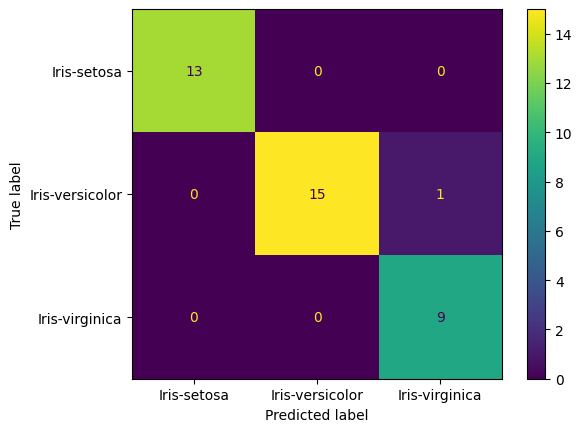

In [218]:
# Confustion matrix
classes = df['Species'].values
cm_df = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_df, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
cm_display.plot()
plt.show()
plt.close()

The model is less accurate as it predicted 1 incorrectly when having to identify the 3 different types of iris.
It confused an iris-virginica with and iris-versicolor 1 time.
The model is still fairly accurate.